In [250]:
import pandas as pd
import numpy as np
import numpy.random as nr
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split


# load the cleaned dataset
data = pd.read_csv(r'data_cleaned.csv')

In [251]:
data1=data.copy()

In [252]:
data1 = data1[data1['country']!='ARE']

# print shape after removing the outliers
print("Shape of the dataset after removing the ARE outliers:")
data1.shape

Shape of the dataset after removing the ARE outliers:


(1686, 18)

In [253]:
# data1['gdp'] = data1['gdp'].astype(float).apply(lambda x: '{:.0f}'.format(x))
# data1['urb_pop'] = data1['urb_pop'].astype(float).apply(lambda x: '{:.0f}'.format(x))

In [254]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1699
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              1686 non-null   object 
 1   year                 1686 non-null   int64  
 2   cereal_yield         1686 non-null   float64
 3   fdi_perc_gdp         1686 non-null   float64
 4   en_per_gdp           1686 non-null   float64
 5   en_per_cap           1686 non-null   float64
 6   co2_ttl              1686 non-null   float64
 7   co2_per_cap          1686 non-null   float64
 8   co2_per_gdp          1686 non-null   float64
 9   pop_urb_aggl_perc    1686 non-null   float64
 10  prot_area_perc       1686 non-null   float64
 11  gdp                  1686 non-null   float64
 12  gni_per_cap          1686 non-null   float64
 13  under_5_mort_rate    1686 non-null   float64
 14  pop_growth_perc      1686 non-null   float64
 15  pop                  1686 non-null   f

In [255]:
data1=data1.drop(['country','year'],axis=1)

In [256]:
data1['classify'] = np.where((data1['cereal_yield'] > 550) & (data1['fdi_perc_gdp'] > 2.0) & (data1['en_per_gdp'] > 0.25) & (data1['en_per_cap'] > 250), 'red', 'green')


In [257]:
data1.head()

,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop,classify
0,417.4,5.449515,179.271884,565.451027,4367.397,0.409949,129.971142,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,10653515.0,6.687032,4.099473e+06,green
2,2666.1,1.285579,173.122857,1434.960601,117021.304,3.536073,426.614517,39.119646,4.772468,1.897200e+11,3960.0,25.8,1.372593,33093579.0,1.762636,2.890393e+07,green
3,1603.3,1.306912,208.686644,4926.727783,281530.258,16.288490,689.948873,60.356798,7.915273,3.299655e+11,18380.0,8.6,1.274577,17284000.0,1.438378,1.478473e+07,green
4,5463.0,0.209142,128.939160,3381.073790,65888.656,8.448456,322.186648,19.746121,20.991143,1.721664e+11,21200.0,8.9,1.134999,7798899.0,1.134999,5.131676e+06,green
5,2585.7,0.004491,154.496130,116.511476,15940.449,0.147913,196.135682,9.443704,1.537922,3.095744e+10,300.0,137.9,2.359199,107768749.0,4.260207,2.174773e+07,green


In [258]:



# corr_matrix = data1.corr().abs()

# # Find features with high correlation
# high_corr_features = set()
# for i in range(len(corr_matrix.columns)):
#     for j in range(i):
#         if corr_matrix.iloc[i, j] > 0.8:
#             colname = corr_matrix.columns[i]
#             high_corr_features.add(colname)


# print(high_corr_features)


In [259]:

corr_matrix = data1.corr().abs()


threshold = 0.8


mask = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [col for col in mask.columns if any(mask[col] > threshold)]



data2 = data1.drop(high_corr_features, axis=1)


In [260]:
print("The highly correlated features are:",high_corr_features)

The highly correlated features are: ['co2_per_cap', 'gdp', 'pop', 'urb_pop_growth_perc', 'urb_pop']


In [261]:
data1['classify'].value_counts()

green    861
red      825
Name: classify, dtype: int64

In [262]:
feature_cols = ['cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'pop_urb_aggl_perc',
                    'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc','co2_ttl']
label_col = ['classify']

In [263]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

ValueError: Found input variables with inconsistent numbers of samples: [1686, 1]

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [72]:
from sklearn.svm import SVC
classif = SVC(kernel = 'linear', random_state = 0)
classif.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [73]:
y_pred = classif.predict(X_test)


In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[278  13]
 [ 71  60]]


0.8009478672985783

In [ ]:
x1=classif.predict([])

# Everything about data2

In [16]:
(data2.columns.to_list())

['cereal_yield',
 'fdi_perc_gdp',
 'en_per_gdp',
 'en_per_cap',
 'co2_ttl',
 'co2_per_gdp',
 'pop_urb_aggl_perc',
 'prot_area_perc',
 'gni_per_cap',
 'under_5_mort_rate',
 'pop_growth_perc',
 'classify']

In [26]:
temp=data2.drop(['classify'],axis=1)

In [29]:
temp.describe()

,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gni_per_cap,under_5_mort_rate,pop_growth_perc
count,1686.000000,1686.000000,1686.000000,1686.000000,1.686000e+03,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000
mean,3012.242223,2.962712,249.868360,1888.035242,9.868890e+05,481.368038,21.417306,12.288378,7789.250729,52.282221,1.421588
std,1795.302456,3.955505,186.963581,1753.121932,3.248056e+06,393.531523,12.134195,9.102084,11575.491209,51.430521,1.082635
min,175.700000,-15.027675,66.335372,116.511476,7.077310e+02,45.552592,3.526316,0.000000,80.000000,3.200000,-2.397174
25%,1682.654912,0.844214,136.103560,541.279336,1.439114e+04,255.079674,12.366611,5.919456,772.500000,9.825000,0.619445
50%,2585.600000,2.000702,196.899449,1079.441201,7.728386e+04,365.510906,18.440354,10.293806,2105.000000,32.700000,1.505762
75%,3930.700000,3.704785,288.259935,2844.939397,3.719576e+05,584.717526,28.891450,16.836587,8377.500000,80.504634,2.262302
max,8410.800000,51.373951,1383.380011,8424.312020,3.064936e+07,3343.454250,60.505780,53.749825,58620.000000,239.100000,11.180657


In [27]:
for i in temp.columns:
    x=temp[i].median()
    print(i,x)

cereal_yield 2585.6
fdi_perc_gdp 2.00070235488363
en_per_gdp 196.8994492878095
en_per_cap 1079.44120111644
co2_ttl 77283.8585
co2_per_gdp 365.51090647992754
pop_urb_aggl_perc 18.44035428889855
prot_area_perc 10.2938055471
gni_per_cap 2105.0
under_5_mort_rate 32.7
pop_growth_perc 1.505762399287525


In [28]:
for i in temp.columns:
    x=temp[i].mean()
    print(i,x)

cereal_yield 3012.242223205532
fdi_perc_gdp 2.962712331091012
en_per_gdp 249.86835976898666
en_per_cap 1888.0352417479714
co2_ttl 986889.0263737862
co2_per_gdp 481.3680377748692
pop_urb_aggl_perc 21.417305824164195
prot_area_perc 12.288378046272001
gni_per_cap 7789.250728748045
under_5_mort_rate 52.28222071987929
pop_growth_perc 1.4215877312558043


In [36]:




quartiles = data2.describe(percentiles=[0.25, 0.5, 0.75]).loc[['25%', '50%', '75%']]

# Print the quartile values
print(quartiles)


     cereal_yield  fdi_perc_gdp  en_per_gdp   en_per_cap       co2_ttl  \
25%   1682.654912      0.844214  136.103560   541.279336   14391.14150   
50%   2585.600000      2.000702  196.899449  1079.441201   77283.85850   
75%   3930.700000      3.704785  288.259935  2844.939397  371957.56125   

     co2_per_gdp  pop_urb_aggl_perc  prot_area_perc  gni_per_cap  \
25%   255.079674          12.366611        5.919456        772.5   
50%   365.510906          18.440354       10.293806       2105.0   
75%   584.717526          28.891450       16.836587       8377.5   

     under_5_mort_rate  pop_growth_perc  
25%           9.825000         0.619445  
50%          32.700000         1.505762  
75%          80.504634         2.262302  


In [264]:
data2['classify'] = np.where((data2['cereal_yield'] > 1683) &  ((data2['fdi_perc_gdp']>1)| (data2['en_per_gdp'] > 136))
                             & ((data2['co2_ttl'] >14391)| (data2['co2_per_gdp']>255)) &  ((data2['prot_area_perc'] > 5 )| (data2['pop_urb_aggl_perc'] > 12)) & (data2['gni_per_cap'] > 773), 'red', 'green')


In [265]:
data2['classify'].value_counts()

red      901
green    785
Name: classify, dtype: int64

In [266]:
X = data2.iloc[:, :-1].values
y = data2.iloc[:, -1].values

In [267]:
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [268]:
print(X_test)

[[ 1.92630000e+03  2.74882906e-02  3.08585808e+02 ...  3.50000000e+02
   1.11900000e+02  1.98311322e+00]
 [ 1.80240000e+03  6.61290590e+00  2.73350148e+02 ...  6.10000000e+02
   3.53000000e+01 -5.96060461e-01]
 [ 3.75830000e+03  8.27009654e+00  3.24229392e+02 ...  3.50000000e+02
   3.94000000e+01  1.56000983e+00]
 ...
 [ 1.80540000e+03  5.68544195e-01  2.31918102e+02 ...  4.10000000e+02
   1.22000000e+02  2.75609978e+00]
 [ 3.57540000e+03 -4.83938586e-01  2.48761954e+02 ...  8.05000000e+03
   2.71000000e+01  1.65972268e+00]
 [ 3.58130000e+03  3.30542818e+00  1.64438202e+02 ...  2.37000000e+03
   4.41000000e+01  1.62349996e+00]]


In [271]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Support Vector Machine and it's differnt kernels

In [272]:
from sklearn.svm import SVC
sv = SVC(kernel = 'linear', random_state = 0)
sv.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [273]:
y_pred = sv.predict(X_test)

In [274]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[142  48]
 [ 26 206]]


0.8246445497630331

In [275]:
data2=data2.reset_index()

In [276]:
data2=data2.drop(['index'],axis=1)

In [277]:
data2.head()

,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gni_per_cap,under_5_mort_rate,pop_growth_perc,classify
0,417.4,5.449515,179.271884,565.451027,4367.397,129.971142,15.290728,12.399822,820.0,239.1,3.034866,green
1,2666.1,1.285579,173.122857,1434.960601,117021.304,426.614517,39.119646,4.772468,3960.0,25.8,1.372593,red
2,1603.3,1.306912,208.686644,4926.727783,281530.258,689.948873,60.356798,7.915273,18380.0,8.6,1.274577,green
3,5463.0,0.209142,128.939160,3381.073790,65888.656,322.186648,19.746121,20.991143,21200.0,8.9,1.134999,green
4,2585.7,0.004491,154.496130,116.511476,15940.449,196.135682,9.443704,1.537922,300.0,137.9,2.359199,green


In [278]:
data2.loc[3].values

array([5463.0, 0.209141663473539, 128.939159582508, 3381.07379003113,
       65888.656, 322.186648315368, 19.746120574199, 20.991142712,
       21200.0, 8.9, 1.1349991250421, 'green'], dtype=object)

In [78]:
sc.fit_transform([[417.4, 5.44951457868676, 179.271884079676, 565.451027196188,
       4367.397, 129.971142081192, 15.2907279897761, 12.3998220487, 820.0,
       239.1, 3.03486600826632]])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [84]:
dt.predict([[5463.0, 0.209141663473539, 128.939159582508, 3381.07379003113,
       65888.656, 322.186648315368, 19.746120574199, 20.991142712,
       21200.0, 8.9, 1.1349991250421]])

array(['red'], dtype=object)

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier



# create a decision tree classifier with default parameters
clf = DecisionTreeClassifier()

# calculate cross-validation scores with 5 folds
cv_scores = cross_val_score(clf, X, y, cv=5)

# calculate the mean and standard deviation of the scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# print the results
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", mean_cv_score)
print("Standard deviation of cross-validation score:", std_cv_score)

# fit the model to the entire data and calculate accuracy
clf.fit(X, y)
train_acc = clf.score(X, y)

# print the results
print("Training accuracy:", train_acc)


Cross-validation scores: [0.97337278 0.99109792 0.9851632  0.98813056 0.97329377]
Mean cross-validation score: 0.9822116482011483
Standard deviation of cross-validation score: 0.00748819437243729
Training accuracy: 1.0


In [58]:



# split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# create a decision tree classifier with default parameters
clf1 = DecisionTreeClassifier()

# train the model on the training set
clf1.fit(X_train, y_train)

# calculate the accuracy on the training set
train_acc = clf1.score(X_train, y_train)

# calculate the accuracy on the validation set
val_acc = clf1.score(X_val, y_val)

# calculate the accuracy on the test set
test_acc = clf1.score(X_test, y_test)

# print the results
print("Training accuracy:", train_acc)
print("Validation accuracy:", val_acc)
print("Test accuracy:", test_acc)


Training accuracy: 1.0
Validation accuracy: 0.9852216748768473
Test accuracy: 0.9881516587677726


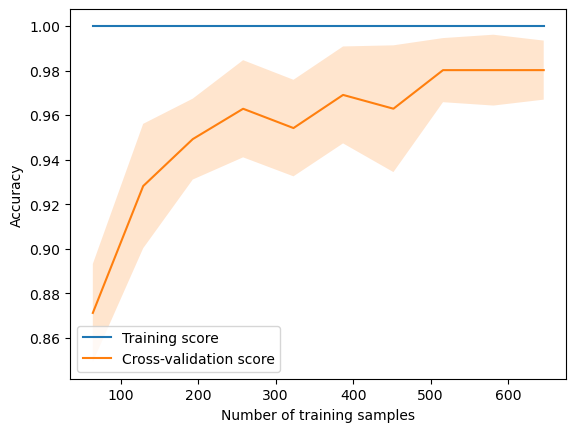

In [114]:
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# load data and split into features and target


# create a decision tree classifier with default parameters
clf2 = DecisionTreeClassifier()

# calculate the learning curves
train_sizes, train_scores, test_scores = learning_curve(
    dt, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# calculate the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plot the learning curves
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


In [279]:
from sklearn.tree import DecisionTreeClassifier
dt3 = DecisionTreeClassifier(criterion='entropy',max_depth=None,min_samples_leaf=1,min_samples_split=2)
dt3.fit(X_train, y_train)
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.990521327014218


In [146]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(dt3, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_
y_pred1 = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print("Best hyperparameters: ", grid_search.best_params_)
print("Accuracy: ", accuracy)


Best hyperparameters:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy:  0.990521327014218


In [93]:
X[2]

array([1.60330000e+03, 1.30691206e+00, 2.08686644e+02, 4.92672778e+03,
       2.81530258e+05, 6.89948873e+02, 6.03567982e+01, 7.91527300e+00,
       1.83800000e+04, 8.60000000e+00, 1.27457750e+00])

In [177]:
dt3.predict([[ -0.59055785, -0.71397591,  0.31756963, -0.84955249, -0.08673933,
        0.5249083 , -0.93282293, -0.7943809 , -0.63482461,  1.15417115,
        0.49967811]])

array(['green'], dtype=object)

In [141]:
sc.inverse_transform([[2.58570000e+03, 4.49146993e-03, 1.54496130e+02, 1.16511476e+02,
       1.59404490e+04, 1.96135682e+02, 9.44370432e+00, 1.53792185e+00,
       3.00000000e+02, 1.37900000e+02, 2.35919934e+00]])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [139]:
X[4]

array([2.58570000e+03, 4.49146993e-03, 1.54496130e+02, 1.16511476e+02,
       1.59404490e+04, 1.96135682e+02, 9.44370432e+00, 1.53792185e+00,
       3.00000000e+02, 1.37900000e+02, 2.35919934e+00])

In [140]:
y[4]

'green'

In [176]:
X_test[0]

array([-0.59055785, -0.71397591,  0.31756963, -0.84955249, -0.08673933,
        0.5249083 , -0.93282293, -0.7943809 , -0.63482461,  1.15417115,
        0.49967811])

In [175]:
y_test[0]

'green'

In [108]:
for i in range(0,len(y_test)):
    if y_test[i]=="red":
        print(i)

6
8
10
16
17
18
19
20
21
23
27
28
30
32
33
34
35
39
40
46
51
52
54
55
57
58
59
62
63
64
66
67
69
70
72
73
74
76
79
80
82
85
86
88
90
91
93
94
96
100
101
102
103
105
108
110
112
114
116
119
121
122
124
125
127
130
131
132
134
135
137
139
143
146
147
149
150
152
153
154
156
158
163
164
172
174
175
178
179
184
188
189
190
192
193
194
195
196
197
198
199
203
204
205
206
207
208
209
210
211
212
213
214
216
217
218
219
222
225
226
228
231
234
235
236
237
238
240
241
242
243
244
246
247
252
254
255
256
257
262
263
265
266
267
268
271
272
276
278
279
280
282
288
290
291
292
293
295
296
297
298
300
301
302
304
305
307
309
311
312
313
314
315
318
320
322
325
326
327
329
331
335
337
338
339
340
344
345
349
350
352
353
354
356
357
358
360
364
366
369
370
372
373
374
375
376
377
381
383
388
389
392
393
394
396
397
398
399
401
402
403
404
405
406
407
409
411
412
413
415
420
421


In [144]:
import joblib

In [149]:
joblib.dump(dt3,'DecisionTreeClassifier.pkl')

['DecisionTreeClassifier.pkl']

In [150]:
y_test[:100]

array(['green', 'green', 'green', 'green', 'green', 'green', 'red',
       'green', 'red', 'green', 'red', 'green', 'green', 'green', 'green',
       'green', 'red', 'red', 'red', 'red', 'red', 'red', 'green', 'red',
       'green', 'green', 'green', 'red', 'red', 'green', 'red', 'green',
       'red', 'red', 'red', 'red', 'green', 'green', 'green', 'red',
       'red', 'green', 'green', 'green', 'green', 'green', 'red', 'green',
       'green', 'green', 'green', 'red', 'red', 'green', 'red', 'red',
       'green', 'red', 'red', 'red', 'green', 'green', 'red', 'red',
       'red', 'green', 'red', 'red', 'green', 'red', 'red', 'green',
       'red', 'red', 'red', 'green', 'red', 'green', 'green', 'red',
       'red', 'green', 'red', 'green', 'green', 'red', 'red', 'green',
       'red', 'green', 'red', 'red', 'green', 'red', 'red', 'green',
       'red', 'green', 'green', 'green'], dtype=object)

In [158]:
sc.inverse_transform(X_test[:100])

array([[-0.56235239, -0.48126889,  0.3583605 , ..., -0.62230216,
         1.13775563,  0.49924695],
       [-0.62799326,  0.74844717,  0.17097291, ..., -0.60028519,
        -0.34524343, -2.13221285],
       [ 0.4082212 ,  1.05789968,  0.441555  , ..., -0.62230216,
        -0.26586619,  0.06756623],
       ...,
       [-0.94648087,  0.1255602 ,  0.39071227, ..., -0.56850002,
         1.51454362,  1.01517953],
       [-0.55747833, -0.51997072,  5.51491653, ..., -0.60282561,
         0.32075093,  0.31943892],
       [-0.64558226,  0.50851252,  1.19590797, ..., -0.62822981,
         1.60433888,  0.99192269]])

In [178]:
X_test[0]

array([-0.59055785, -0.71397591,  0.31756963, -0.84955249, -0.08673933,
        0.5249083 , -0.93282293, -0.7943809 , -0.63482461,  1.15417115,
        0.49967811])

In [179]:
x=sc.inverse_transform([X_test[0]])

In [180]:
for i in range(0,len(x)):
    print(x[i])

[1.92630000e+03 2.74882906e-02 3.08585808e+02 3.80237682e+02
 7.37851738e+05 6.91044949e+02 1.01853643e+01 5.02332899e+00
 3.50000000e+02 1.11900000e+02 1.98311322e+00]


In [245]:
data2.head()

,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gni_per_cap,under_5_mort_rate,pop_growth_perc,classify
0,417.4,5.449515,179.271884,565.451027,4367.397,129.971142,15.290728,12.399822,820.0,239.1,3.034866,green
1,2666.1,1.285579,173.122857,1434.960601,117021.304,426.614517,39.119646,4.772468,3960.0,25.8,1.372593,red
2,1603.3,1.306912,208.686644,4926.727783,281530.258,689.948873,60.356798,7.915273,18380.0,8.6,1.274577,green
3,5463.0,0.209142,128.939160,3381.073790,65888.656,322.186648,19.746121,20.991143,21200.0,8.9,1.134999,green
4,2585.7,0.004491,154.496130,116.511476,15940.449,196.135682,9.443704,1.537922,300.0,137.9,2.359199,green


In [247]:
data2.iloc[1,:-1].values

array([2666.1, 1.28557881763899, 173.122857268895, 1434.96060066516,
       117021.304, 426.614517117445, 39.119646140419, 4.77246763254,
       3960.0, 25.8, 1.37259321757337], dtype=object)

In [217]:
y_test[7]

'green'

In [218]:
X_test[7]

array([-0.20736049,  0.45052223,  0.09522309, -0.02957424, -0.27514019,
        0.4989964 , -1.04884779, -0.83733116, -0.53284887, -0.45581742,
       -1.5446922 ])

In [220]:
x1=sc.inverse_transform([X_test[7]])

In [221]:
y=sc.fit_transform(x1)

In [222]:
print(y)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [287]:
X_test[1]

array([-0.65898003,  0.88534893,  0.12970146, -0.72930498, -0.30503333,
       -0.06550882,  1.21715607, -0.58046771, -0.61216334, -0.33346605,
       -1.88674519])

In [281]:
y_test[0]

'green'

In [284]:
import joblib

In [286]:
joblib.dump(sc,'scaler.joblib')

['scaler.joblib']

In [291]:
data2.head()

,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gni_per_cap,under_5_mort_rate,pop_growth_perc,classify
0,417.4,5.449515,179.271884,565.451027,4367.397,129.971142,15.290728,12.399822,820.0,239.1,3.034866,green
1,2666.1,1.285579,173.122857,1434.960601,117021.304,426.614517,39.119646,4.772468,3960.0,25.8,1.372593,red
2,1603.3,1.306912,208.686644,4926.727783,281530.258,689.948873,60.356798,7.915273,18380.0,8.6,1.274577,green
3,5463.0,0.209142,128.939160,3381.073790,65888.656,322.186648,19.746121,20.991143,21200.0,8.9,1.134999,green
4,2585.7,0.004491,154.496130,116.511476,15940.449,196.135682,9.443704,1.537922,300.0,137.9,2.359199,green


In [292]:
data2.to_csv("data2.csv",index=False)

In [293]:
data2.head(10)

,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gni_per_cap,under_5_mort_rate,pop_growth_perc,classify
0,417.4,5.449515,179.271884,565.451027,4367.397,129.971142,15.290728,12.399822,820.0,239.1,3.034866,green
1,2666.1,1.285579,173.122857,1434.960601,117021.304,426.614517,39.119646,4.772468,3960.0,25.8,1.372593,red
2,1603.3,1.306912,208.686644,4926.727783,281530.258,689.948873,60.356798,7.915273,18380.0,8.6,1.274577,green
3,5463.0,0.209142,128.939160,3381.073790,65888.656,322.186648,19.746121,20.991143,21200.0,8.9,1.134999,green
4,2585.7,0.004491,154.496130,116.511476,15940.449,196.135682,9.443704,1.537922,300.0,137.9,2.359199,green
5,3990.0,0.510803,367.387480,2560.054449,59706.094,992.618530,13.789261,2.416870,1620.0,22.3,-0.991363,red
6,1358.0,0.973189,124.898118,394.957523,5779.192,268.213775,25.655982,8.583622,760.0,116.7,2.306643,green
7,1850.6,0.270783,131.112804,939.256647,219330.604,201.231977,35.137914,10.994541,2870.0,57.1,1.654581,green
8,2580.7,0.480500,283.945526,7388.563674,449053.486,612.576462,39.968292,6.016160,20420.0,8.0,1.360506,red
9,6292.7,1.177912,111.040848,3628.002500,42350.183,190.616973,15.075603,14.860385,34800.0,7.8,1.302564,red


In [294]:
data2.iloc[9,:-1].values

array([6292.7, 1.17791200474775, 111.040847559158, 3628.0025, 42350.183,
       190.616973138534, 15.0756029411765, 14.8603846479, 34800.0, 7.8,
       1.30256421951548], dtype=object)

In [295]:
input_lst= [6292.7, 1.17791200474775, 111.040847559158, 3628.0025, 42350.183,
       190.616973138534, 15.0756029411765, 14.8603846479, 34800.0, 7.8,
       1.30256421951548]
inp_data_norm=sc.transform([input_lst])

print(inp_data_norm)

[[ 1.82073043 -0.43458569 -0.73569316  1.01826734 -0.2933604  -0.7482878
  -0.52799916  0.3088139   2.36779455 -0.86753946 -0.13001116]]


In [297]:
dt3.predict([[1.82073043, -0.43458569 ,-0.73569316,  1.01826734, -0.2933604,  -0.7482878,
  -0.52799916,  0.3088139,   2.36779455, -0.86753946, -0.13001116]])

array(['red'], dtype=object)